In [97]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [98]:
CONCEPT_SIZE = 10000
start_m = 200 
sigma = 0.95

In [99]:
def is_true(instance, concept):
    return instance[0] >= concept[0][0] and instance[1] >= concept[0][1] and instance[0] <= concept[1][0] and instance[1] <= concept[1][1] 

In [100]:
def learn(training_instances, target_concept):
    learned_concept = np.array([[10000, 100000], [-10, -10]])
    for training_instance in training_instances:
        if is_true(training_instance, target_concept) and not is_true(training_instance, learned_concept):
            learned_concept[0][0] = min(learned_concept[0][0], training_instance[0])
            learned_concept[0][1] = min(learned_concept[0][1], training_instance[1])
            learned_concept[1][0] = max(learned_concept[1][0], training_instance[0]) 
            learned_concept[1][1] = max(learned_concept[1][1], training_instance[1]) 
    
    return learned_concept

In [101]:
def calculate_error(test_instances, concept, target_concept):
    error = 0
    for test_instance in test_instances:
        if is_true(test_instance, concept) != is_true(test_instance, target_concept):
            error += 1
    return error / test_instances.size

In [102]:
target_concepts = np.random.randint(0, 100, size=(CONCEPT_SIZE, 2, 2))
m_list = list(range(start_m, CONCEPT_SIZE + start_m))
contor = 0
error_list = [0] * CONCEPT_SIZE


for target_concept in target_concepts:
    m = m_list[contor]
    TEST_SIZE = max(1, int(m / 4))
    training_instances = np.random.randint(0, 100, size=(m, 2))
    learned_concept = learn(training_instances, target_concept)
    test_instances = np.random.randint(0, 100, size=(TEST_SIZE, 2))

    error = calculate_error(test_instances, learned_concept, target_concept) 
    error_list[contor] = error
    contor += 1


In [103]:
m_theoretical_list = [0] * CONCEPT_SIZE
error_list_relation = np.linspace(0.005, 0.015, CONCEPT_SIZE)

for contor in range(0, CONCEPT_SIZE):
    error = error_list_relation[contor]
    m_theoretical_list[contor] = 1/error*(4 * math.log(2/sigma, 2) + 8 * 4 * math.log(13/error, 2))
    #m_theoretical_list[contor] = int(m >= m_theoretical)

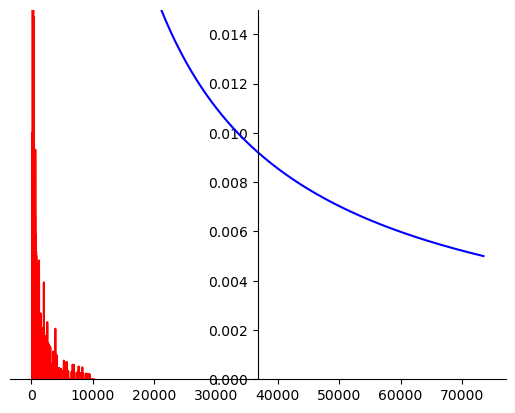

In [104]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylim(0, 0.015)

plt.plot(m_list, error_list, 'r')
plt.plot(m_theoretical_list, error_list_relation, 'b')
plt.show()